In [13]:
import pickle
import matplotlib.pyplot as plt

In [202]:
database,scale_x,scale_y = pickle.load(open("db_dump.pkl","rb"))

In [5]:
import cv2

In [203]:
img = cv2.imread(database[0][0])

TypeError: bad argument type for built-in operation

In [212]:
for (i,d) in enumerate(database):
    if d[2] == 'chicken':
        print(i)
database[9][2]

142
173
196
242
271
284
298
360
413
587
600
754
814
858
936


'bird'

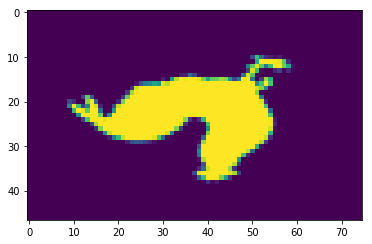

In [213]:
plt.imshow(database[142][0])
plt.show()

In [97]:
mm = []
for P in database:
    #P = database[13][0]
    im2, contours, hierarchy = cv2.findContours(P[0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    if len(contours) != 1:
        kk = []
        for c in contours:
            kk.append(c.shape[0])
        mm.append(float(kk[-1])/float(kk[-2]))
print(np.array(mm).mean())
        

160.702902632


[array([[[2189, 1387]],

       [[2188, 1388]],

       [[2187, 1388]],

       ..., 
       [[2192, 1387]],

       [[2191, 1387]],

       [[2190, 1387]]], dtype=int32)]


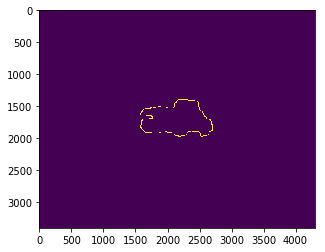

14571671


'636006000063333333333333333333630000600006333333333600000000000000000063333333336000000000633333333660000000633333333630060000000000000000000000000000000000000000000000000000000006333333333333333333336000000000652222222253333333533333333333333333333333333333333333333333333333333333333333333333333333333333363000000000633333333335222252225333333333533333333333333333333333333333333333333333333333333333333333333333333333333333333333333333522222525333533333333333333333333333363000000006333333333333333333333333333333363336333636060006633333333333333333333333522252255353333333333363336336363066006333333333333333333336366000000633333333333333333333333333333333333333333336600000006333333333335225225535333333333363660600006333333333333333333333600000000633333333360006000063333333636000000000000000000633333333360000000000000000000633333336360000000000000000000000004041111141111111111111111111111111111111111111111111111111111111111111111111111400000040114111111111111111111111111111111111111111111

In [108]:
P = database[17][0]
im2, contours, hierarchy = cv2.findContours(P, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(contours)
k = cv2.drawContours(np.zeros(P.shape), contours, 0, (255,0,0), 10)
plt.imshow(k)
plt.show()
print((k==0).sum())
get_freeman(contours[0])

In [107]:
dirs = {(0,1):'0',(1,0):'1',(0,-1):'2',(-1,0):'3',(1,1):'4',(-1,-1):'5',(-1,1):'6',(1,-1):'7'}
def get_freeman(cnt):
    free_man = ''
    p = cnt[0][0]
    for pp in cnt[1:]:
        delta = pp[0]-p
        p = pp[0]
        free_man += dirs[(delta[0],delta[1])]
    return free_man

In [43]:
import numpy as np

In [35]:
im2.shape

(1687, 2815)

In [199]:
freeman_of = pickle.load(open("freeman_dump.pkl", "rb"))

In [200]:
l = []
for c in freeman_of:
    l.append(freeman_of[c])

In [201]:
l[1]

'6333336336363666606000404444141141141111114111117111111711711717777722222552535353533533333533333333'

In [116]:
import Levenshtein as leven
dir(leven)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_levenshtein',
 'apply_edit',
 'distance',
 'editops',
 'hamming',
 'inverse',
 'jaro',
 'jaro_winkler',
 'matching_blocks',
 'median',
 'median_improve',
 'opcodes',
 'quickmedian',
 'ratio',
 'seqratio',
 'setmedian',
 'setratio',
 'subtract_edit']

In [120]:
leven.quickmedian(l[:10])

'063333333333333333033333333333333333333336630333333333333333300330633633333333330003333333333033330330033333336333333333000033303333333003333330330033333003330333333033333330333063333333330033303033330033300333333303333000036300333300033330003303333300330033033036330330330333003333003333300033333333333003333333000333330330033333033333333333300000333330331111313333333000333301333131100000131122322203333333333300223330633333330003332233033233311333300333333333333333113333333301333330033333033333333333333333330003333333333000033333333330333333000033333300003333333360003331030011311000000100031011331101333111101110000101111010000000010333333000010000000003113333111001001111131111000013333000011100000000000033000633333333333303333333333333333333333333303333330033333333333333333333033133331033333333006333333333330330333333333333033334333330033333333333000333306333300000113333300000013333003331110003300000000000100100001011000030111100030000000000000001100000000000110113300000103011400111111

In [139]:
m = input()

spring-4.pgm : spring spring-17.pgm : spring spring-9.pgm : spring spring-5.pgm : spring spring-10.pgm : spring device9-17.pgm : device9 device9-5.pgm : sea_snake device9-8.pgm : device9 device9-1.pgm : device9 device9-16.pgm : device9 teddy-9.pgm : teddy teddy-5.pgm : teddy teddy-18.pgm : teddy teddy-2.pgm : teddy teddy-8.pgm : teddy device6-9.pgm : device6 device6-1.pgm : device6 device6-7.pgm : device6 device6-20.pgm : device3 device6-17.pgm : device6 lmfish-18.pgm : watch lmfish-6.pgm : lmfish lmfish-10.pgm : lmfish lmfish-7.pgm : lmfish lmfish-8.pgm : lmfish device4-3.pgm : HCircle device4-5.pgm : device5 device4-19.pgm : device4 device4-20.pgm : device4 device4-17.pgm : hat tree-16.pgm : tree tree-8.pgm : tree tree-17.pgm : tree tree-20.pgm : tree tree-4.pgm : tree device1-10.pgm : device1 device1-1.pgm : device1 device1-16.pgm : device1 device1-2.pgm : device1 device1-17.pgm : device1 cup-16.pgm : cup cup-7.pgm : cup cup-4.pgm : device3 cup-17.pgm : cup cup-18.pgm : cup bird-19.

In [140]:
k = 0
l = 0
for i in range(0,len(m.split(" ")),3):
    k+=1
    if m.split(" ")[i].split("-")[0] == m.split(" ")[i+2]:
        l += 1

In [141]:
print(float(l)/float(k))

0.8819875776397516


In [138]:
47/70

0.6714285714285714

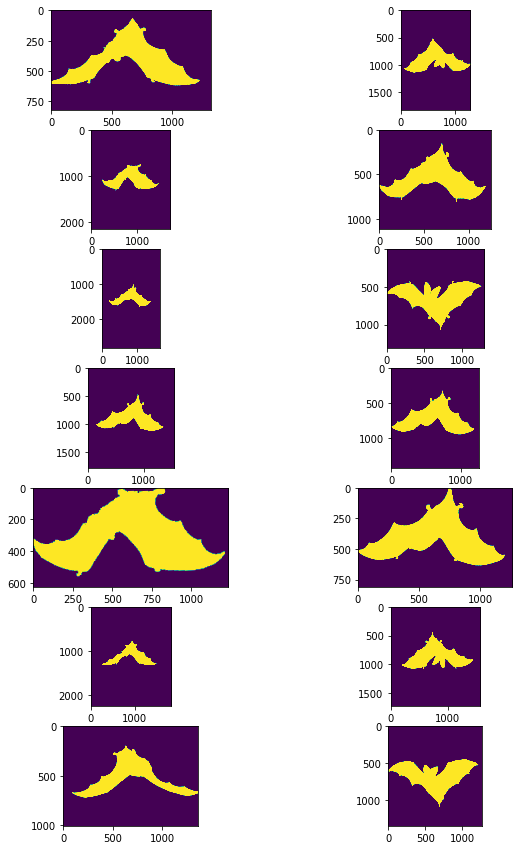

In [192]:
i = 1
plt.figure(figsize=(10,15))
for d in database:
    if d[2] == "bat":
        im2, contours, hierarchy = cv2.findContours(d[0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        cnt = contours[0]
        epsilon = 0.01*cv2.arcLength(cnt,True)
        #print(epsilon)
        approx = cv2.approxPolyDP(cnt,epsilon,True)
        k = cv2.fillConvexPoly(np.zeros(d[0].shape), approx, (255,0,0), 10)
        ax = plt.subplot(7,2,i)
        ax.imshow(d[0])
        #plt.imshow(approx)
        i += 1
        if i == 15:
            break
        
plt.show()

In [214]:
def rotate(strg,n):
    return strg[n:] + strg[:n]

In [218]:
rotate("hello",4)

'ohell'